# Decision Tree Lab

In [98]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from CS270Boi.discussion270 import Discussion

## 1.0 (0%) Set `net_id` to Your NetID

In [99]:
# This should match your BYU email.
# For example, if my BYU email were jake270@byu.edu, I would set net_id to "jake270"

net_id = "ttromm6"

# --------------------_Make sure to run all of the cells before continuing_--------------------
### The discussions and text box are loaded in by running the cell associated with the discussion.
### If you experience any problems/errors with the discussions, please send Jake Cahoon (TA) a message on Discord :)

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [3]:
#Debug
PATH_TO_IRIS_ARFF = 'datasets/iris.arff'

iris_dataset = arff.loadarff(PATH_TO_IRIS_ARFF)
iris_df = pd.DataFrame(iris_dataset[0])

X = iris_df.iloc[:, :-1].values
y = np.array([x.decode('utf-8') for x in iris_df.iloc[:, -1].values]) # convert bytes to string

clf = DecisionTreeClassifier()
clf.fit(X, y)
print('Accuracy:', clf.score(X, y))

Accuracy: 1.0


### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [4]:
# Evaluation

PATH_TO_IRIS_ARFF = 'datasets/iris.arff'

iris_dataset = arff.loadarff(PATH_TO_IRIS_ARFF)
iris_df = pd.DataFrame(iris_dataset[0])

X = iris_df.iloc[:, :-1].values
y = np.array([x.decode('utf-8') for x in iris_df.iloc[:, -1].values]) # convert bytes to string

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
print('Accuracy:', clf.score(X, y))

Accuracy: 0.9733333333333334


In [120]:
# @title 1.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "1.1DT"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

The Iris dataset has 4 features. When training a DecisionTreeClassifier on this dataset, we got a training accuracy of 1.0 when using default hyperparameters and .9733 when setting the max_depth hyperparameter to 3. Max_depth controls how many levels the generated decision tree has. A new level is generated when the dataset is split on a feature. There are 4 features in the iris dataset, so the max depth of a fully induced tree would be 4. The fact that the training accuracy went down when using a max_depth of 3 indicates that the fully induced tree uses all 4 features for splitting to reach some leaf nodes, and when using max_depth of 3, the induced tree will not consider at least 1 feature when traversing the tree to a leaf node. This likely introduces impurity into some of the leaf nodes and is likely what leads to a slightly reduced training accuracy when using a max_depth of 3. 

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [100]:
# Learn Voting with missing values.
from sklearn.preprocessing import OneHotEncoder

PATH_TO_VOTING_ARFF = 'datasets/voting_with_missing.arff'

voting_dataset = arff.loadarff(PATH_TO_VOTING_ARFF)
voting_df = pd.DataFrame(voting_dataset[0])

print("number of features before one hot encoding:", len(voting_df.columns[:-1]))

one_hot_encoded_voting_features = pd.get_dummies(voting_df.iloc[:, :-1])

X = one_hot_encoded_voting_features.values
y = np.array([x.decode('utf-8') for x in voting_df.iloc[:, -1].values])

print("number of features after one hot encoding:", len(X[0]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

voting_clf = DecisionTreeClassifier()
voting_clf.fit(X_train, y_train)
print('Training Accuracy:', voting_clf.score(X_train, y_train))
print('Testing Accuracy:', voting_clf.score(X_test, y_test))

number of features before one hot encoding: 16
number of features after one hot encoding: 48
Training Accuracy: 1.0
Testing Accuracy: 0.9080459770114943


In [119]:
# @title 2.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.1DT"
questions = ["How did you handle the missing values?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**How did you handle the missing values?**

The dataset has 16 features, each of which is either 'y', 'n', or missing. In the arff file, missing values are indicated by a '?'. To handle missing values, I used one-hot encoding on all input features. After doing so, I had 48 features rather than 16. This makes sense because each feature had 3 possible values: {'y', 'n', '?'}. One-hot encoding introduces a new binary column for each possible value of a feature, so it is expected that 48 features would be generated because 16 * 3 = 48. After handling nominal and missing data with one-hot encoding, I found a training accuracy of 1 and a testing accuracy of .908, which are good results. 

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [6]:
from sklearn.model_selection import cross_val_score

PATH_TO_CARS_ARFF = 'datasets/cars.arff'

cars_dataset = arff.loadarff(PATH_TO_CARS_ARFF)
cars_df = pd.DataFrame(cars_dataset[0])

one_hot_encoded_cars_features = pd.get_dummies(cars_df.iloc[:, :-1])

X = one_hot_encoded_cars_features.values
y = np.array([x.decode('utf-8') for x in cars_df.iloc[:, -1].values]) # convert bytes to string

cars_clf = DecisionTreeClassifier()

scores = cross_val_score(cars_clf, X, y, cv=10)
print('10-fold cross validation accuracies:', scores)
print('Average:', np.mean(scores))
scores = cross_val_score(cars_clf, X, y, cv=5)
print('5-fold cross validation accuracies:', scores)
print('Average:', np.mean(scores))

cars_clf.fit(X, y)
pass

10-fold cross validation accuracies: [0.75722543 0.74566474 0.93063584 0.67630058 0.84971098 0.9132948
 0.88439306 0.87283237 0.9127907  0.91860465]
Average: 0.8461453152305418
5-fold cross validation accuracies: [0.74566474 0.72543353 0.74566474 0.75362319 0.8057971 ]
Average: 0.7552366591270838


In [121]:
# @title 2.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.2DT"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

# model able to predict on smaller data better (10 fold smaller sets)

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

n-fold cross validation divides the dataset up into n smaller datasets. For each smaller dataset, it uses the current set as a test set and the other n-1 sets combined as a training set. It then computes test accuracy for the current training and test sets. It then goes to the next small set and uses that as the new test set and the other n-1 sets combined as the new training set. This continues until all n smaller datasets have been used as the test set. At the end, there will be n test accuracies computed. Using 10-fold cross validation, I found the average test accuracy of the 10 computed accuracies to be .846. For 5-fold cross validation, I found the average test accuracy of the 5 computed accuracies to be .755. The model is performing better when using more folds. This makes sense because the test sets will be smaller and the there will be more overall test runs.



### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

----- Fully Induced Voting Tree -----


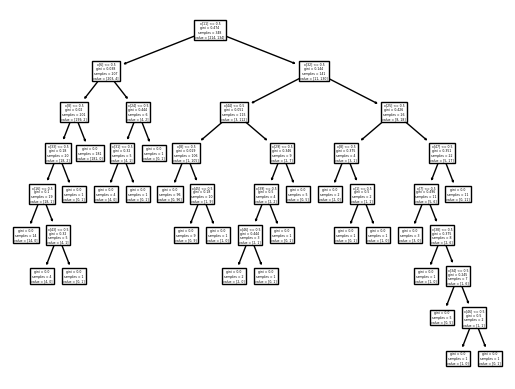

----- Fully Induced Cars Tree -----


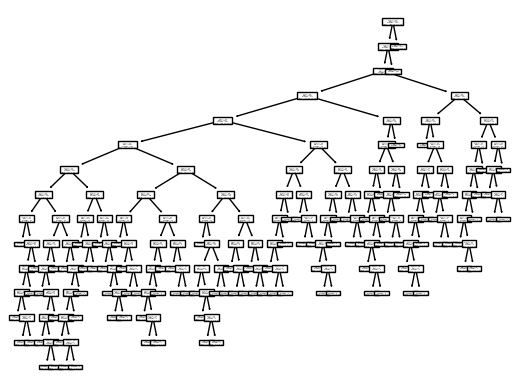

----- Voting Tree w/ Max Depth 2 -----
Voting Feature Importances:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.00773929 0.         0.         0.97086373
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02139698 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


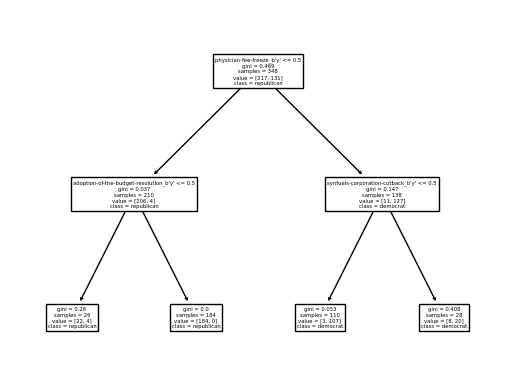

----- Cars Tree w/ Max Depth 2 -----
Cars Feature Importances:
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.
 0.  0.6 0. ]


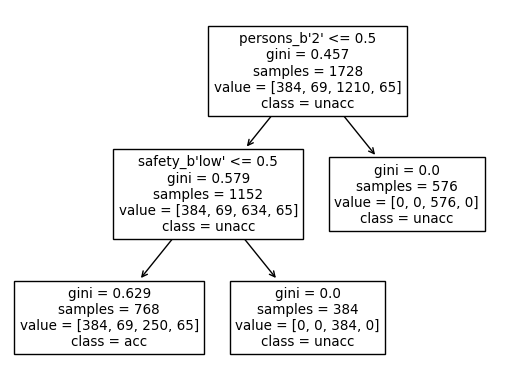

In [113]:
#Print induced trees for the voting and car data sets
from sklearn import tree

# voting tree
print('----- Fully Induced Voting Tree -----')
tree.plot_tree(voting_clf)
plt.show()



# cars tree
print('----- Fully Induced Cars Tree -----')
tree.plot_tree(cars_clf)
plt.show()

# voting tree w max_depth = 2
one_hot_encoded_voting_features = pd.get_dummies(voting_df.iloc[:, :-1])

X = one_hot_encoded_voting_features.values
y = np.array([x.decode('utf-8') for x in voting_df.iloc[:, -1].values])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

voting_clf = DecisionTreeClassifier(max_depth=2)
voting_clf.fit(X_train, y_train)

print('----- Voting Tree w/ Max Depth 2 -----')
print('Voting Feature Importances:\n', voting_clf.feature_importances_)
tree.plot_tree(voting_clf, feature_names=one_hot_encoded_voting_features.columns.values, class_names=['republican', 'democrat' ])
plt.show()

# cars tree w max_depth = 2
one_hot_encoded_cars_features = pd.get_dummies(cars_df.iloc[:, :-1])

X = one_hot_encoded_cars_features.values
y = np.array([x.decode('utf-8') for x in cars_df.iloc[:, -1].values])

cars_clf = DecisionTreeClassifier(max_depth=2)
cars_clf.fit(X, y)

print('----- Cars Tree w/ Max Depth 2 -----')
print('Cars Feature Importances:\n', cars_clf.feature_importances_)
tree.plot_tree(cars_clf, feature_names=one_hot_encoded_cars_features.columns.values, class_names=['acc', 'good', 'unacc', 'v-good'])
plt.show()



In [117]:
# @title 2.3 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.3DT"
questions = ["What did the Decision Tree learn about the Voting dataset?", "What did the Decision Tree learn about the Cars dataset?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**What did the Decision Tree learn about the Voting dataset?**

The voting decision tree with a max_depth of 2 chose 'physician-fee-freeze' as the most important attribute for classifying as either republican or democrat. The tree found that those who identified as republican were very likely to support 'physician-fee-freeze' and those who identified as democrat were very likely to not support it. The next two most important features for classification that the model found were 'adoption-of-the-budget-resolution' and 'synfuels-corporation-cutback'. Republicans were very likely to support 'adoption-of-the-budget-resolution' and democrats were very likely to support 'synfuels-corporation-cutback'. These three attributes match up exactly with the classifier's feature_importances_ property. The 12th item in the  importances array matches the 4th feature (due to the one-hot encoding). This feature is 'physician-fee-freeze', and it is the item with the highest feature importance of .971. The other 2 discovered attributes match up on the next two highest items in the importances array. The other features in the dataset have feature importances of 0 in the array because they are not considered in the tree due to the max_depth hyperparameter. The rules this tree have discovered are if a person supports 'physician-fee-freeze', they are classified as a republican no matter if they support 'adoption-of-the-budget-resolution' (they likely will), and if they don't support 'physician-fee-freeze, they are classified as a democrat no matter if they support 'synfuels-corporation-cutback' (they likely will).

**What did the Decision Tree learn about the Cars dataset?**

The cars dataset classifies a car instance as very good, good, acceptable, or unacceptable. The cars decision tree discovered that the most important feature for classification was 'persons'. This is a numerical feature for how many people the car can carry (seats). The model discovered that all 2-seater instances were classified as unacceptable, which makes it a perfect feature to split on first because it results in a pure leaf node immediately. The model then chose 'safety' as the next most important feature to split on. All instances that were given a 'safety' value of low were classified as unacceptable, which makes 'safety' another perfect feature to split on because it also introduces a pure leaf node. In summary, the model has learned that the 2 most important features for classification are if the car instance is a 2-seater, and if not, if it has been given a low safety rating. These two features (persons, safety) also line up with the 2 highest feature_importances_ of .6 and .4 respectively in the feature_importances_ array. Here are the rules that the car tree has discovered. If a car is a 2-seater, then it classified as unacceptable. If it is not a 2-seater but is marked as low safety, then it is also classified as unacceptable. If it is not a 2-seater and is not marked as low safety, then it is classified as acceptable.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [30]:
# Experiment with criterion parameter
from tabulate import tabulate

X = voting_df.iloc[:, :-1].values
y = np.array([x.decode('utf-8') for x in voting_df.iloc[:, -1].values])

X = OneHotEncoder().fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

values = ['gini', 'entropy', 'log_loss']
table_headers = ['Criterion', 'Training Accuracy', 'Testing Accuracy']
table_results = []

for value in values:
  voting_clf = DecisionTreeClassifier(criterion=value)
  voting_clf.fit(X_train, y_train)
  table_results.append([value, voting_clf.score(X_train, y_train), voting_clf.score(X_test, y_test)])

print(tabulate(table_results, headers=table_headers, tablefmt='grid'))

+-------------+---------------------+--------------------+
| Criterion   |   Training Accuracy |   Testing Accuracy |
+=============+=====================+====================+
| gini        |                   1 |           0.954023 |
+-------------+---------------------+--------------------+
| entropy     |                   1 |           0.942529 |
+-------------+---------------------+--------------------+
| log_loss    |                   1 |           0.954023 |
+-------------+---------------------+--------------------+


In [116]:
# @title 2.4 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.4DT"
questions = ["Discuss the effects each split criterion had."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss the effects each split criterion had.**

I worked with the voting dataset again. I again used one-hot encoding to handle the nominal and missing values. I used a .2 train-test split and trained/tested a DecisionTreeClassifier 3 different times using gini, entropy, and log_loss splitting criteria respectively. The criterion parameter controls how the model chooses which features to split on. Each of the 3 options uses a different algorithm for this purpose, but they tend to perform similarly. This can be seen in this instance. Across all 3 criteria, the model produced a perfect training accuracy of 1. They also had very similar testing accuracies: .954 for gini, .943 for entropy, and .954 for log_loss. My hypothesis is that that the voting dataset is simple enough that each algorithm is discovering mostly same features to split on. A possible reason for slight discrepancies in testing accuracies is that the last splitting features differ slightly between algorithms. The last splitting features are the least important in terms of classifying an instance, which is why the testing accuracies are only slightly different.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [45]:
# Explore different overfit parameters

# Fully induced car tree

X = cars_df.iloc[:, :-1].values
y = np.array([x.decode('utf-8') for x in cars_df.iloc[:, -1].values])

X = OneHotEncoder().fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cars_clf = DecisionTreeClassifier()
cars_clf.fit(X_train, y_train)
print('Fully Induced Cars Tree Training Accuracy:', cars_clf.score(X_train, y_train))
print('Fully Induced Cars Tree Testing Accuracy:', cars_clf.score(X_test, y_test))
print('Fully Induced Cars # of Nodes:', cars_clf.tree_.node_count)
print('Fully Induced Cars Tree Depth:', cars_clf.tree_.max_depth)

# min_samples_leaf
print('----- min_samples_leaf -----')
values = [1, 5, 10]

table_headers = ['Min Samples Leaf', 'Training Accuracy', 'Testing Accuracy', '# of Nodes', 'Tree Depth']
table_results = []

for v in values:
  cars_clf = DecisionTreeClassifier(min_samples_leaf=v)
  cars_clf.fit(X_train, y_train)
  table_results.append([v, cars_clf.score(X_train, y_train), cars_clf.score(X_test, y_test), cars_clf.tree_.node_count, cars_clf.tree_.max_depth])

print(tabulate(table_results, headers=table_headers, tablefmt='grid'))

# min_samples_split
print('----- min_samples_split -----')
values = [2, 5, 10]

table_headers = ['Min Samples Split', 'Training Accuracy', 'Testing Accuracy', '# of Nodes', 'Tree Depth']
table_results = []

for v in values:
  cars_clf = DecisionTreeClassifier(min_samples_split=v)
  cars_clf.fit(X_train, y_train)
  table_results.append([v, cars_clf.score(X_train, y_train), cars_clf.score(X_test, y_test), cars_clf.tree_.node_count, cars_clf.tree_.max_depth])

print(tabulate(table_results, headers=table_headers, tablefmt='grid'))

# min_impurity_decrease
print('----- min_impurity_decrease -----')
values = [0.01, 0.05, 0.5]

table_headers = ['Min Impurity Decrease', 'Training Accuracy', 'Testing Accuracy', '# of Nodes', 'Tree Depth']
table_results = []

for v in values:
  cars_clf = DecisionTreeClassifier(min_impurity_decrease=v)
  cars_clf.fit(X_train, y_train)
  table_results.append([v, cars_clf.score(X_train, y_train), cars_clf.score(X_test, y_test), cars_clf.tree_.node_count, cars_clf.tree_.max_depth])

print(tabulate(table_results, headers=table_headers, tablefmt='grid'))

# max_depth
print('----- max_depth -----')
values = [2, 5, 10]

table_headers = ['Max Depth', 'Training Accuracy', 'Testing Accuracy', '# of Nodes', 'Tree Depth']
table_results = []

for v in values:
  cars_clf = DecisionTreeClassifier(max_depth=v)
  cars_clf.fit(X_train, y_train)
  table_results.append([v, cars_clf.score(X_train, y_train), cars_clf.score(X_test, y_test), cars_clf.tree_.node_count, cars_clf.tree_.max_depth])

print(tabulate(table_results, headers=table_headers, tablefmt='grid'))

# max_leaf_nodes
print('----- max_leaf_nodes -----')
values = [5, 10, 15]

table_headers = ['Max Leaf Nodes', 'Training Accuracy', 'Testing Accuracy', '# of Nodes', 'Tree Depth']
table_results = []

for v in values:
  cars_clf = DecisionTreeClassifier(max_leaf_nodes=v)
  cars_clf.fit(X_train, y_train)
  table_results.append([v, cars_clf.score(X_train, y_train), cars_clf.score(X_test, y_test), cars_clf.tree_.node_count, cars_clf.tree_.max_depth])

print(tabulate(table_results, headers=table_headers, tablefmt='grid'))

# max_features
print('----- max_features -----')
values = [5, 10, 15]

table_headers = ['Max Features', 'Training Accuracy', 'Testing Accuracy', '# of Nodes', 'Tree Depth']
table_results = []

for v in values:
  cars_clf = DecisionTreeClassifier(max_features=v)
  cars_clf.fit(X_train, y_train)
  table_results.append([v, cars_clf.score(X_train, y_train), cars_clf.score(X_test, y_test), cars_clf.tree_.node_count, cars_clf.tree_.max_depth])

print(tabulate(table_results, headers=table_headers, tablefmt='grid'))

Fully Induced Cars Tree Training Accuracy: 1.0
Fully Induced Cars Tree Testing Accuracy: 0.9450867052023122
Fully Induced Cars # of Nodes: 161
Fully Induced Cars Tree Depth: 13
----- min_samples_leaf -----
+--------------------+---------------------+--------------------+--------------+--------------+
|   Min Samples Leaf |   Training Accuracy |   Testing Accuracy |   # of Nodes |   Tree Depth |
+====================+=====================+====================+==============+==============+
|                  1 |            1        |           0.942197 |          161 |           13 |
+--------------------+---------------------+--------------------+--------------+--------------+
|                  5 |            0.971056 |           0.942197 |          101 |           11 |
+--------------------+---------------------+--------------------+--------------+--------------+
|                 10 |            0.945007 |           0.919075 |           67 |           10 |
+--------------------+----

In [115]:
# @title 3.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.1DT"
questions = ["Discuss what you learned about overfit.", "Were you able to find hyperparameters that achieved a higher testing accuracy than the fully induced tree?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss what you learned about overfit.**

The fully induced tree had a training accuracy of 1 and a testing accuracy of .945. A perfect training accuracy is often a sign of overfit, but the testing accuracy is still quite high, so the fully induced tree seems to still perform well. I learned that the more complicated the induced tree is, the more likely it is overfitting. This is because the tree becomes so fine-grained with splitting all attributes to reach any leaf node that it essentially memorizes the training data. One example of this is when using max_features = 5. In this case, the tree has 529 nodes and a depth of 14, both of which are higher than the fully induced tree's values of 161 nodes and a depth of 13. With a much more complicated tree, the training accuracy stayed at 1, but the testing accuracy dropped to .835. Another thing that I learned was that methods that attempt to reduce overfit can often lead to a slight reduction in the training accuracy in exchange for an increased testing accuracy. This makes sense because less overfit means that the model generalizes better and avoids memorizing the training data. One example of this is when using max_depth = 10. This brought the training accuracy down to .989 and the testing accuracy slightly up to .947.

**Were you able to find hyperparameters that achieved a higher testing accuracy than the fully induced tree?**

The fully induced tree had a testing accuracy of .945. I discovered that using a max_depth of 10 slightly increased the testing accuracy to .947. I also discovered that using a min_samples_split of 2 also slightly increased the testing accuracy to .948. Finally, I found that setting max_features to 10 or 15 increased the testing accuracy to .957 and .954 respectively. This shows that even though the fully induced tree performed well, there may have still been slight overfit in place that was reduced further using these parameters.

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [16]:
# Pruning

X = cars_df.iloc[:, :-1].values
y = np.array([x.decode('utf-8') for x in cars_df.iloc[:, -1].values])

X = OneHotEncoder().fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

table_headers = ['ccp_alpha', 'Training Accuracy', 'Testing Accuracy', '# of Nodes', 'Tree Depth']
table_results = []

values = [.001, .005, .01, .05, .1, .5, 1]

for v in values:
  cars_clf = DecisionTreeClassifier(ccp_alpha=v)
  cars_clf.fit(X_train, y_train)
  table_results.append([v, cars_clf.score(X_train, y_train), cars_clf.score(X_test, y_test), cars_clf.tree_.node_count, cars_clf.tree_.max_depth])

print(tabulate(table_results, headers=table_headers, tablefmt='grid'))




+-------------+---------------------+--------------------+--------------+--------------+
|   ccp_alpha |   Training Accuracy |   Testing Accuracy |   # of Nodes |   Tree Depth |
+=============+=====================+====================+==============+==============+
|       0.001 |            0.98987  |           0.950867 |          115 |           12 |
+-------------+---------------------+--------------------+--------------+--------------+
|       0.005 |            0.929088 |           0.930636 |           37 |            8 |
+-------------+---------------------+--------------------+--------------+--------------+
|       0.01  |            0.899421 |           0.910405 |           27 |            8 |
+-------------+---------------------+--------------------+--------------+--------------+
|       0.05  |            0.77424  |           0.791908 |            5 |            2 |
+-------------+---------------------+--------------------+--------------+--------------+
|       0.1   |      

In [114]:
# @title 3.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.2DT"
questions = ["Interpret your table.", "Which ccp_alpha value achieved the best testing accuracy?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Interpret your table.**

The sklearn documentation says that the greater the ccp_alpha parameter is, the more nodes will be pruned from the tree. I experimented with ccp_alpha values from .001 to 1. What I discovered was that the more I increased ccp_alpha, the more nodes that were pruned (which matches the docs) and the worse both the training and testing accuracies got. ccp_alpha values of .1 and above actually pruned the entire tree so that there was only 1 root node and no splitting. To me, this shows that for this dataset, pruning is not helpful in reducing overfit, because the resulting tree does not help increase testing accuracies; rather, it does the opposite. 

**Which ccp_alpha value achieved the best testing accuracy?**

The ccp_value that achieved the best testing accuracy was .001. This actually did slightly help the testing accuracies. From 3.1, the fully induced tree had 161 nodes and a testing accuracy of .945. Using ccp_value of .001, the resulting tree contained 115 nodes and a testing accuracy of .951. The training accuracy also slightly decreased from 1 to .989. This means that using a very low ccp_alpha helped reduce the slight overfit in the fully induced tree. Higher ccp_alpha values were overkill and pruned the tree too much to be considered effective.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [20]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
liver_disorders = fetch_ucirepo(id=60) 
  
# data (as pandas dataframes) 
X = liver_disorders.data.features
y = liver_disorders.data.targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# defaults
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
print('------- Tree Statistics ------')
print('# of Nodes:', regressor.tree_.node_count)
print('# of leaf nodes:', regressor.tree_.n_leaves)
print('Tree Depth:', regressor.tree_.max_depth)
print('------- MAE and DT Regressor Score ------')
print('Training MAE:', mean_absolute_error(y_train, regressor.predict(X_train)))
print('Testing MAE:', mean_absolute_error(y_test, regressor.predict(X_test)))
print('Training DT Regressor Score:', regressor.score(X_train, y_train))
print('Testing DT Regressor Score:', regressor.score(X_test, y_test))

# .02 min_impurity_decrease, 5 min_samples_leaf, max_depth=5
print('----- .02 min_impurity_decrease, 5 min_samples_leaf, max_depth=5 -----')
regressor = DecisionTreeRegressor(min_impurity_decrease=.02, min_samples_leaf=5, max_depth=5)
regressor.fit(X_train, y_train)
print('------- Tree Statistics ------')
print('# of Nodes:', regressor.tree_.node_count)
print('# of leaf nodes:', regressor.tree_.n_leaves)
print('Tree Depth:', regressor.tree_.max_depth)
print('------- MAE and DT Regressor Score ------')
print('Training MAE:', mean_absolute_error(y_train, regressor.predict(X_train)))
print('Testing MAE:', mean_absolute_error(y_test, regressor.predict(X_test)))
print('Training DT Regressor Score:', regressor.score(X_train, y_train))
print('Testing DT Regressor Score:', regressor.score(X_test, y_test))


------- Tree Statistics ------
# of Nodes: 365
# of leaf nodes: 183
Tree Depth: 19
------- MAE and DT Regressor Score ------
Training MAE: 0.0
Testing MAE: 3.0652173913043477
Training DT Regressor Score: 1.0
Testing DT Regressor Score: -0.22273468301365762
----- .01 min_impurity_decrease, 3 min_samples_leaf -----
------- Tree Statistics ------
# of Nodes: 37
# of leaf nodes: 19
Tree Depth: 5
------- MAE and DT Regressor Score ------
Training MAE: 1.8881565122644584
Testing MAE: 2.4082334019532086
Training DT Regressor Score: 0.46313302597675887
Testing DT Regressor Score: 0.15514426166301543


In [113]:
# @title 4.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "4.1DT"
questions = ["Discuss your general findings.", "Did you adjust any hyperparameters to achieve a greater testing accuracy?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss your general findings.**

I ran an initial regression with all default hyperparameters. The resulting tree had 365 nodes and a depth of 19. The training MAE was 0 (perfect) and the training regressor score was 1.0 (perfect). All of these are a serious sign of overfit, which can be seen because the testing regressor score was -.222, which is very bad (A regressor score of 0 happens when the model just outputs the expected value of the targets every time, so negative values are even worse). This model has completely memorized the training data and is not generalizing at all. 

**Did you adjust any hyperparameters to achieve a greater testing accuracy?**

To address the overfit, I set min_impurity_decrease to .02, min_sample_leafs to 5, and max_depth to 5. Using these hyperparameters, I had moderate success. The number nodes dropped to 37 and the treed depth dropped to 5, meaning the tree got much simpler. The testing MAE dropped from 3.07 to 2.41, and the testing regressor score increased from -.222 to .155. This means that the model is not overfitting, however, it is still not scoring very well. I believe that is because the dataset is too small. There are only 345 instances in the dataset, which is likely why it completely overfit initially. Even when using hyperparameters to reduce overfit, there is probably not enough data for the model to become robust and generalize well.

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly.
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

In [112]:
# @title 5.0 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "5.0DT"
questions = ["Include a general discussion about what you did/learned by implementing your own C4.5 Decission Tree."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned by implementing your own C4.5 Decission Tree.**

I implemented my own C4.5 decision tree. By doing so, I got much more comfortable with entropy, information gain, and other concepts of decision trees. One thing that was tough for me was the fact that the child nodes needed to hold that value that the parent node was splitting on. That was tough to work around, but it became much easier when I worked through the pizza dataset by hand again. My implementation did not work as well as sklearn's implementation. On the voting dataset, sklearn achieved a training accuracy of 1.0 and a testing accuracy of .908. My implementation achieved a training accuracy of .624 and a testing accuracy of .575. Clearly my model did worse. One hypothesis of mine of the difference was is that it is due to the fact that sklearn's model uses the CART algorithm and mine uses the C4.5 algorithm. However, I don't think that that would contribute solely towards the large discrepancy in accuracy scores because as we talked about in class, both algorithms have been benchmarked against each other and tend to perform similarly. Another hypothesis of mine is that there is a small flaw in the logic of my model. My model only achieved an accuracy score of .444 on the test pizza dataset. For such a small dataset, I thought that the model should have memorized the input data perfectly and achieved a perfect accuracy score. Because that didn't happen, I believe there may be a flaw in my model. However, I still feel like I learned a lot about decision trees through the process.

In [102]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

# Node for the decision tree
class Node():
    def __init__(self, feature_index=None, value=None, class_value=None, children=[], is_leaf=False):
        self.feature_index = feature_index # index of feature to split on
        self.value = value  # value of parent's feature
        self.children = children # list of children nodes (one for each unique value of feature)
        self.class_value = class_value # class value if node is a leaf
        self.is_leaf = is_leaf # is node a leaf


class DTClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(counts=[2,3,2,2])
            Dataset =
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """
        self.counts = counts

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.tree = self._build_tree(X, y)
        return self

    def _calculate_entropy(self, y):
        def num_items_in_arr(arr, item):
            return len([i for i in arr if i == item])
        
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            prob_of_class = num_items_in_arr(y, cls) / len(y)
            entropy += prob_of_class * np.log2(prob_of_class)
        return (entropy * -1)

    def _calculate_information_gain(self, X, y, feature_index):
        parent_entropy = self._calculate_entropy(y) # entropy of entire feature

        values = np.unique(X[:, feature_index]) # unique values of feature
        entropy_after_split = 0
        for value in values:
            subset_y = y[X[:, feature_index] == value]
            entropy_after_split += ((len(subset_y) / len(y)) * self._calculate_entropy(subset_y))
        information_gain = parent_entropy - entropy_after_split
        return information_gain

    # choose the feature that maximizes information gain
    def _choose_best_feature(self, X, y, already_chosen_feature_indices=[]):
        best_feature = None
        best_information_gain = -1
        for i in range(X.shape[1]):
            if i in already_chosen_feature_indices:
                continue
            information_gain = self._calculate_information_gain(X, y, i)
            if information_gain > best_information_gain:
                best_information_gain = information_gain
                best_feature = i
        return best_feature

    # X is current feature set, y is current target set, value is the value of the parent's feature
    def _build_tree(self, X, y, value=None, already_chosen_feature_indices=[]):
        if len(np.unique(y)) == 1: # pure node
            return Node(class_value=y[0], is_leaf=True, value=value)
        
        if len(X[0]) == 0: # no features left
            return Node(class_value=np.bincount(y).argmax(), is_leaf=True, value=value)
        
        best_feature_index = self._choose_best_feature(X, y, already_chosen_feature_indices)

        if best_feature_index is None:
            return Node(class_value=np.bincount(y).argmax(), is_leaf=True, value=value)

        already_chosen_feature_indices.append(best_feature_index)

        curr = Node(feature_index=best_feature_index, value=value, children=[])

        for val in np.unique(X[:, best_feature_index]):
            subset_X = X[X[:, best_feature_index] == val]
            subset_y = y[X[:, best_feature_index] == val]

            curr.children.append(self._build_tree(subset_X, subset_y, val, already_chosen_feature_indices))

        return curr



    def _classify_instance(self, instance, currNode):
        if currNode.is_leaf:
            return currNode.class_value
        
        print(currNode.feature_index)
        
        feature_index = currNode.feature_index

        value = instance[feature_index]

        child_to_traverse = None
        for child in currNode.children:
            if value == child.value:
                child_to_traverse = child

        return self._classify_instance(instance, child_to_traverse)

    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """

        predictions = []
        for instance in X:
            predictions.append(self._classify_instance(instance, self.tree))
        
        return np.array(predictions)

    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets
        """
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


In [107]:
# Optional Debugging Dataset - Pizza Homework
pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
pizza_labels = np.array([2,0,1,2,1,2,1,1,0])

clf = DTClassifier(counts=0)

clf.fit(pizza_dataset, pizza_labels)
clf.score(pizza_dataset, pizza_labels)

0.4444444444444444

In [111]:
X = voting_df.iloc[:, :-1].values
y = np.array([x.decode('utf-8') for x in voting_df.iloc[:, -1].values])

X = OneHotEncoder().fit_transform(X).toarray()

y = [0 if x == 'republican' else 1 for x in y]

clf = DTClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print('Training Accuracy:', clf.score(X_train, y_train))
print('Testing Accuracy:', clf.score(X_test, y_test))

Training Accuracy: 0.6235632183908046
Testing Accuracy: 0.5747126436781609
